<a href="https://colab.research.google.com/github/felix-rosenberger/Assignment-2-Python-and-GraphDB/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Username: Felix Rosenberger

# Introduction

This notebook is for the major project submission for COMP7220/8220, on the [image/language] dataset and task.  It contains the following sections:

*   a description of the selected conventional ML model;
*   some notes about the choices made in building the conventional ML model;
*   a description of the selected deep learning model;
*   some notes about the choices made in building the deep model; and
*   a discussion of the performance of the two models.



# Library and Data Import

In [42]:
# library import
import os
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# notebook setup
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Colab Notebooks/COMP8220/Major_Project/image-classification')

Mounted at /content/gdrive


In [4]:
# read data in
train = np.load('Data/Training_data_images.npy')
test = np.load('Data/PublicTest_data_images.npy')
labels = np.load('Data/Training_data_labels.npy')

# Basic Data Exploration

Let's first have a look at the different arrays.

In [5]:
# training data
print(f'The training data: \t{train.shape}\n'
      f'The test data: \t\t{test.shape}\n'
      f'The label data: \t{labels.shape}\n')


The training data: 	(9328, 48, 48)
The test data: 		(1136, 48, 48)
The label data: 	(9328,)



We can see that the **training data consists of 9328 images**, each of which is a 48x48 array itself. The image size represents the pixels of each image. Similarly, the test data consists of 1136 images. The label data is vector containing the labels of the 9328 training images. We'll know look at the labels in more detail.

In [6]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6])

The integers shown are the unique image labels which correspond to emotions displayes on the images. The above order correspond to the labels **[angry, disgusted, fearful, happy, sad, surprised, neutral]**.
Let's look at the first 6 images and corresponding labels.

In [30]:
# create label dict
keys = list(np.unique(labels))
values = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
label_classes = dict(zip(keys, values)) # provide key value pairs using zip
print(label_classes)

{0: 'angry', 1: 'disgusted', 2: 'fearful', 3: 'happy', 4: 'sad', 5: 'surprised', 6: 'neutral'}


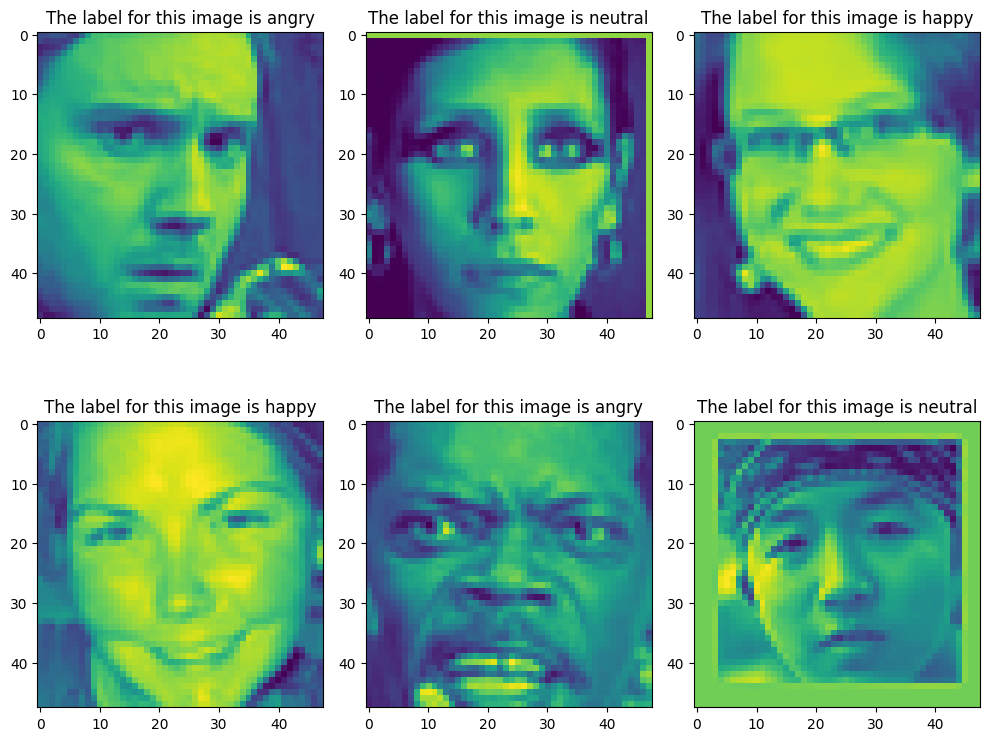

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
for i in range(len(train[0:6])):
    lookup_key = labels[i]
    subplot = ax[i // 3, i % 3] # get current subplot
    subplot.imshow(train[i]) # plot image on the current subplot
    subplot.set_title(f'The label for this image is {label_classes[lookup_key]}') # set title to corresponding label

plt.tight_layout() # no overlap
plt.show()

Next we'll look at the range of pixel sizes for each image.

In [20]:
# loop through all images and check min max values
n = 0
for i in range(len(train)):
  min = np.min(train[i])
  max = np.max(train[i])
  if min < 0 and max > 1:
    print('values out of normalisation range')
  else:
    n += 1

print(f'All pixel values are between 0 and 1') if n == len(train) else print(f'Pixel scales are not aligned')

All pixel values are between 0 and 1


We now know that all pixel sizes are between 0 and 1. Hence normalisation is not required at a later stage for preprocessing.

# Conventional ML Model

The final model that produced the best-performing predictions for the Kaggle submission (accuracy x%) was an SVM with a polynomial kernel.  The features were ...

## Data Preprocessing and Feature Extraction

### Image Flattening
In order to feed our data into any ML algorithm, we need to flatten the multidimensional structure into a 2D format. Hence for each picture in our sample, the 48x48 2D structure will be flattened out into a vector of 2304 pixels (48*48) which will then serve as features. Hence the training data will result in a 2D array of 9328x2304. The same will be done for the test data.

In [43]:
# reshape training data
n_samples = train.shape[0] # length of training data
n_features = train.shape[1] * train.shape[2] # length of feature vector
X_train_full = train.reshape((n_samples, n_features)) # reshape into 2D array of corresponding dimensions

# reshape test data
n_samples = test.shape[0] # length of training data
n_features = test.shape[1] * test.shape[2] # length of feature vector
X_test = test.reshape((n_samples, n_features)) # reshape into 2D array of corresponding dimensions

# show dimensions
print(f'The training data dimensions: \t{X_train.shape}\n'
      f'The test data dimensions: \t{X_test.shape}\n')

The training data dimensions: 	(9328, 2304)
The test data dimensions: 	(1136, 2304)



### Create Validation Set
To support model generalisation, we'll split the training data into training and validation data. Considering the amount of training data available, adding 10% to the validation set seems reasonable. Later on, generalisation will also be evaluated using cross-validation. Let's first look at the distribution of class labels in the training data.

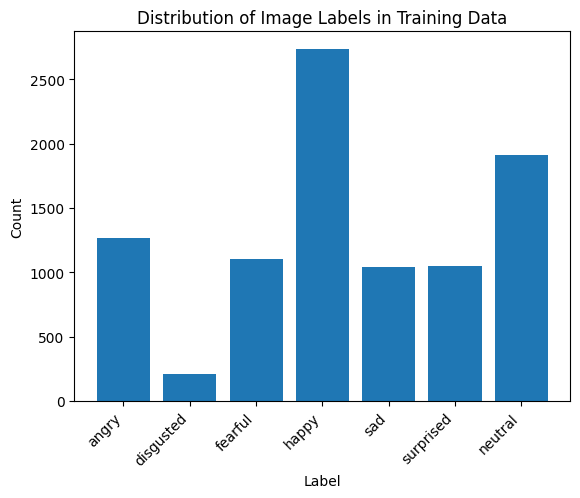

In [49]:
# get unique labels and number of occurrence
unique, counts = np.unique(labels, return_counts=True)

# map unique labels to their corresponding expression
label_names = [label_classes[label_num] for label_num in unique]

plt.bar(label_names, counts)
plt.title("Distribution of Image Labels in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show();

In [ ]:
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train_full, labels, test_size=0.1, random_state=42)

### Feature Descriptors
e.g. HOG features, HOF features or MBH features


In [ ]:
# some initialisation code

The code below handles feature extraction by first preprocessing the text, and then ...

In [ ]:
# preprocessing + feature extraction code

The model is defined ...

In [ ]:
# model definition code

# Discussion on Conventional ML Model

For the final model, hyperparameters were chosen by ...

In addition to the final model, I also tried a logistic regression model, ...  This performed fairly poorly (accuracy y%) ...  This may have been because ...

# Deep Learning Model

The final model that produced the best-performing predictions for the Kaggle submission (accuracy (x+5)%) was a fully connected dense model with NN layers.  The input was the raw data that had been preprocessed by ...

## Data Preprocessing
https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/

https://prince-canuma.medium.com/image-pre-processing-c1aec0be3edf

https://www.kaggle.com/code/khotijahs1/cv-image-preprocessing

https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

### Data Augmentation
https://www.section.io/engineering-education/image-preprocessing-in-python/

## Regularisation
e.g. Monte Carlo Droput

[Following this, code and comments as above.]

# Discussion on Deep Learning Model

For the final model, hyperparameters were chosen by ...

In addition to the final model, I also tried a CNN with two conv layers and ...  This performed almost as well as the final model (accuracy (x-3)%) ...  This gap in performance may have been because ...

# Discussion of Model Performance and Implementation

Comparing my final conventional ML and deep learning models, the deep learning one performed better by 5% on the public test set.  The deep learning model ranked #12 out of N submissions on the public test set, with the top-performing system having z% accuracy, and a majority class baseline having z'% accuracy ...

[E.g. discussion about what performance on validation set versus public test set might say about your models or about the dataset.]

[E.g. discussion about what performance on private test set versus public test set might say about your models or about the dataset.]

[E.g. discussion about what inspecting the data might say about your models or about the dataset.]

[E.g. reflection on resource required for models or other implementation issues.]

